---
title: Perceptron
author: Jay-U Chung
date: '2023-02-22'
#image: "image.jpg"
description: "An implementation of the Perceptron Algorithm."
format: html
---

Link to code: <DO THIS>

## What is the Perceptron?

The Perceptron is a type of machine learning algorithm called a binary linear classifier. Given data with binary labels, the Perceptron can produce a hyperplane that separates the data according to each labels. Hence prediction only requires knowing the orientation of the point relative to the hyperplane. However, as we shall see, the Perceptron is limited by whether or not the data is linearly separable.

## Breakdown of the Perceptron Algorithm

The Perceptron functions by using a weight vector $\bf{w}$ to characterize the (hopefully) separating hyperplane. After starting with a random initial guess for the weights, we continually update the weights by first choosing a random index i and hence its random point X_i. 

As a note in the code, I convert the $i^{th}$ label y[i] to y_sign_i with 2*y[i]-1. This step just ensures that instead of being mapped to 0 or 1 as y is, y_sign_i will be mapped to -1 and 1.

The main idea of the update is to add y_sign_i*X_i to the weights for points X_i with incorrect labels. This step changes the weight so the label on point X_i will be closer to the correct one. We check if the predicted label is incorrect by checking if the dot product of w and X_i multiplied by y_sign_i is negative or positive. Then, if the signs are the same, this quantity will be positive, and hence the multiplier to the shift in weights is 0 (so no change). Otherwise the weight vector is updated with this shift.

In [ ]:
from perceptron import Perceptron

#function used to find separating hyperplane
perceptron.fit(X,y,max_steps)

"""
Perceptron update code
"""

#take a random index i
i = np.random.randint(n-1)

#choose point X_i
X_i = X_[i]

#convert label of point i to -1 or 1
y_sign_i = 2*y[i]-1

#update weight
self.w = self.w + int(np.dot(self.w,X_i)*y_sign_i < 0  )*y_sign_i*X_i

## Experiments

### 2D Linearly Separable Data

Below I have plotted the given example for running the Perceptron algorithm on data with 2 features.

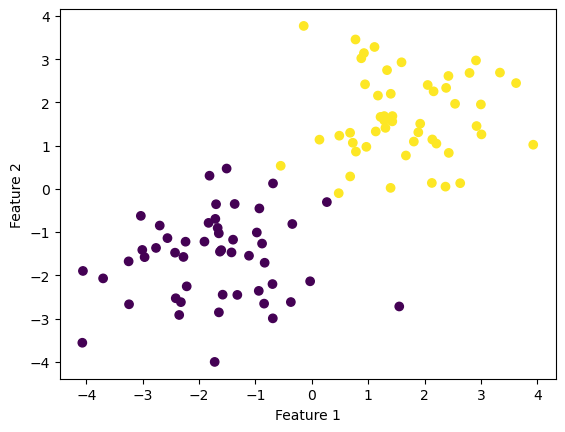

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
from matplotlib import pyplot as plt

from sklearn.datasets import make_blobs

np.random.seed(12345)

n = 100 
p_features = 3

X, y = make_blobs(n_samples = 100, n_features = p_features - 1, centers = [(-1.7, -1.7), (1.7, 1.7)])

fig = plt.scatter(X[:,0], X[:,1], c = y) 
xlab = plt.xlabel("Feature 1") 
ylab = plt.ylabel("Feature 2")

Running the code, we can see that a perfect accuracy of 1.0 is reached. The weight vector corresponds to the example given.

In [2]:
from perceptron import Perceptron
%load_ext autoreload
%autoreload 2

p = Perceptron()
p.fit(X, y, max_steps=1000)
print("Weight vector: ",p.w)
print("Final accuracy: ", p.score(X,y))
print("Last 10 accuracy scores: ",p.history[-10:]) #just the last few values

Score is good enough!
Weight vector:  [2.10557404 3.1165449  0.25079936]
Final accuracy:  1.0
Last 10 accuracy scores:  [0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 1.0]


This plot shows the evolution of the accuracy over iterations, which does not always increase.

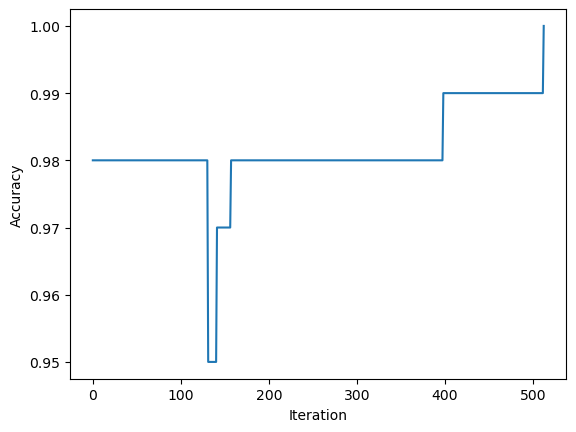

In [3]:
fig = plt.plot(p.history)
xlab = plt.xlabel("Iteration")
ylab = plt.ylabel("Accuracy")

The data can now be visualized with the separating line between the two clusters of points.

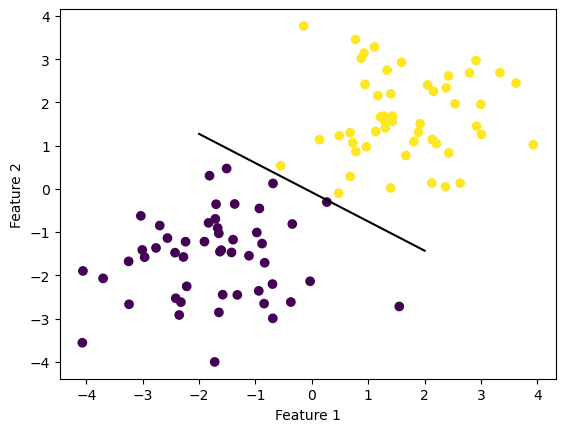

In [4]:
def draw_line(w, x_min, x_max):
  x = np.linspace(x_min, x_max, 101)
  y = -(w[0]*x + w[2])/w[1]
  plt.plot(x, y, color = "black")

fig = plt.scatter(X[:,0], X[:,1], c = y)
fig = draw_line(p.w, -2, 2)

xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

### 2D Non-linearly separable data
Below, I run the Perceptron algorithm on the same data, but shifted so that it is just barely not linearly separable.

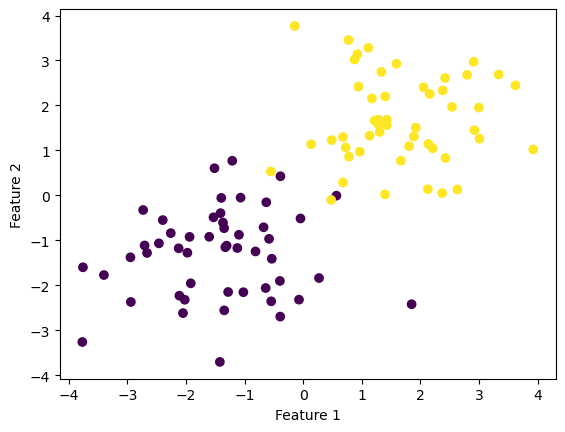

In [7]:
np.random.seed(12345)

X2, y2 = make_blobs(n_samples = 100, n_features = p_features - 1, centers = [(-1.4, -1.4), (1.7, 1.7)])

fig2 = plt.scatter(X2[:,0], X2[:,1], c = y) 
xlab2 = plt.xlabel("Feature 1") 
ylab2 = plt.ylabel("Feature 2")

Now running the Perceptron algorithm:

In [9]:
p2 = Perceptron()
p2.fit(X2, y2, max_steps=1000)
print("Weight vector: ",p2.w)
print("Final accuracy: ", p2.score(X2,y2))
print("Last 10 accuracy scores: ",p2.history[-10:]) #just the last few values

Weight vector:  [ 2.56926963  4.22077252 -0.74920064]
Final accuracy:  0.98
Last 10 accuracy scores:  [0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98]


We can see from plotting the accuracy that, while we never converge to a perfect classification after 1000 iterations, the score is still high.

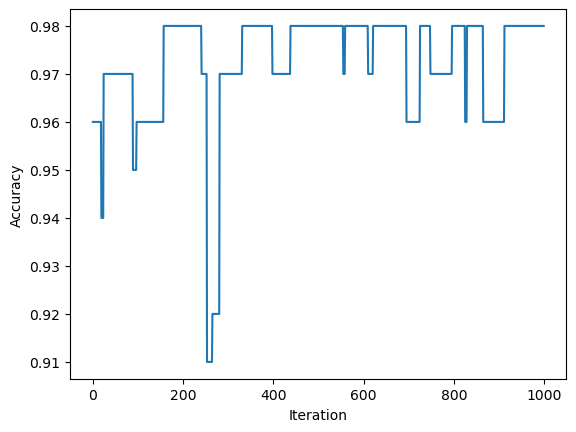

In [10]:
fig2 = plt.plot(p2.history)
xlab2 = plt.xlabel("Iteration")
ylab2 = plt.ylabel("Accuracy")

### 6D Linearly Separable Data

These next points in 6D are not visualizable, but we can still run the Perceptron algorithm.

In [11]:
p_features = 7

X3, y3 = make_blobs(n_samples = 100, n_features = p_features - 1, centers = [(-1.7, 1.7, 1.7, -1.7, -1.7, 1.7), (1.7, 1.7, 1.7, 1.7, 1.7, 1.7)])

p3 = Perceptron()
p3.fit(X3, y3, max_steps=1000)
print("Weight vector: ",p3.w)
print("Final accuracy: ", p3.score(X3,y3))
print("Last 10 accuracy scores: ",p3.history[-10:]) #just the last few values

Score is good enough!
Weight vector:  [ 5.55526998  1.58997633 -1.00733643  1.04302711  3.54095849 -0.6594312
  0.95889091]
Final accuracy:  1.0
Last 10 accuracy scores:  [0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 1.0]


In this case, we do actually achieve a 100% classification! The data therefore is linearly separable.

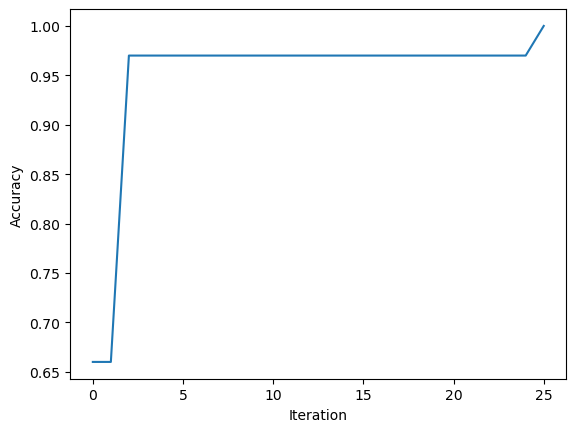

In [12]:
fig3 = plt.plot(p3.history)
xlab3 = plt.xlabel("Iteration")
ylab3 = plt.ylabel("Accuracy")

## Runtime Complexity

In equation (1), we have a dot product between $\bf{\tilde{w}}^{(t)}$ and $\bf{x_i}$. As both are dimension $p+1$, this accounts for $O(p)$ term by term multiplication and addition prodcedures. The addition of $\bf{\tilde{w}}^{(t)}$ and $\bf{x_i}$ similarly consists of $O(p)$ additions. So the total complexity is $O(p)$. Since this is for a single index, the total number of points $n$ is irrelevant.